<a href="https://colab.research.google.com/github/fatimaAfzaal/Diabetes-Prediction-Project-Using-Voting-Classifier/blob/main/Diabetes_Prediction_Using_Voting_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction Project Using Voting Classifier

## STEP 1:
### Problem definition
We have to define the problem and set goal that we we have to do

## STEP 2:
### Data Collection and Exploration
This is the step where we have to collect the data required. As in our project we get the dataset from kaggle(https://www.kaggle.com/datasets/mathchi/diabetes-data-set)

Also in this step we will explore data to get insight and use visualizations as well if needed to understand data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')            # Mount Google Drive to access data

Mounted at /content/gdrive


### Data Collection

In [15]:
import pandas as pd                                                        #for data manipulation
import numpy as np                                                         #for numerical operations
from matplotlib import pyplot as plt                                       #for visualization
import seaborn as sns                                                      #for visualization
from sklearn.ensemble import RandomForestClassifier, VotingClassifier      #for using Random forest Classifier algorithm
from sklearn.metrics import accuracy_score                                 #for accouracy
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/'+"diabetes.csv") #Read a CSV file by given path



df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


## Data Exploration

In [3]:
print('Total number of records: ',len(df))                # For checking number of records

Total number of records:  768


In [4]:
print("Parameter are: ",df.columns)                     #For printing coloumn names

Parameter are:  Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [5]:
df.info()                           #Get insight about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [6]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Outcome'].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

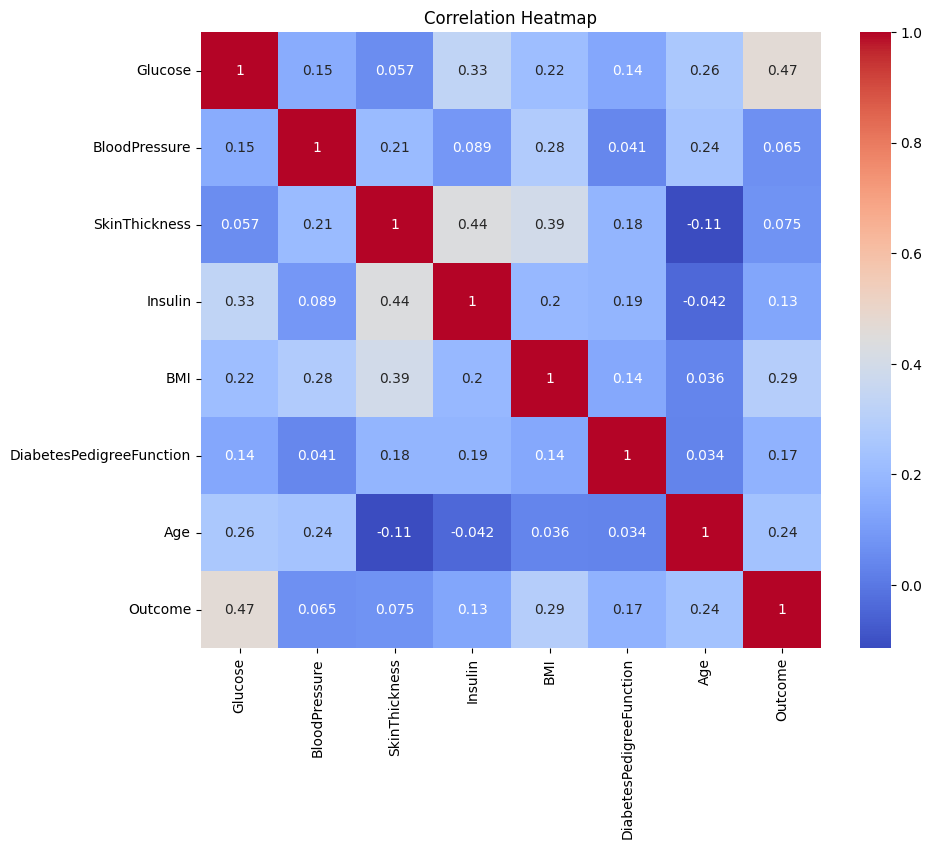

In [8]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## STEP 3:
### Data Preprocessing
In this step we will perform task as handling missing values and encode catagorical data



### Handling missing values

In [9]:
df.isnull().values.any()

False

In [10]:
true_count= len(df.loc[df['Outcome']==True])
False_count= len(df.loc[df['Outcome']==False])
(true_count,False_count)

(268, 500)

### Finding Correlation between Attributes

In [11]:
df.corr()['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

# Data spliting
In this step we will split data in to testing and training data

In [12]:
from sklearn.model_selection import train_test_split
X = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = df['Outcome']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

# Model Selection and Model Training
Firstly we will select the right algorithm according to our requirement and then we will train data on model

In [16]:
rf = RandomForestClassifier(n_estimators=200)
lr = LogisticRegression()
svm = SVC(probability=True)

In [17]:
# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[('rf', rf), ('lr', lr), ('svm', svm)], voting='soft')
# Fit the voting classifier on the training data
voting_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=200)),
                             ('lr', LogisticRegression()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

# Model Evaluation or Testing

In [20]:
ensemble_predictions = voting_classifier.predict(X_test)

In [18]:
accuracy = voting_classifier.score(X_test, Y_test)
print("Accuracy of Voting Classifier:", accuracy)

Accuracy of Voting Classifier: 0.7575757575757576


In [21]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(Y_test, ensemble_predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[138  19]
 [ 37  37]]


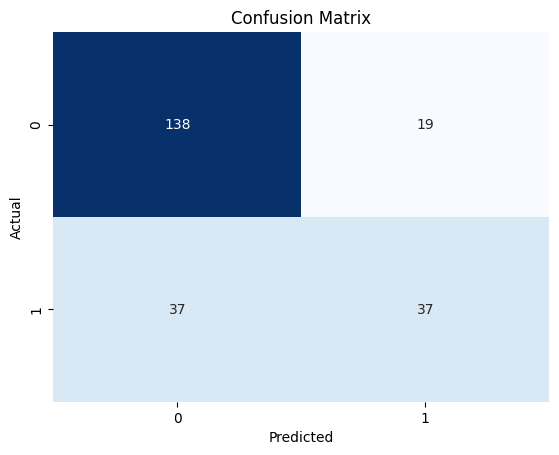

In [22]:
cm = confusion_matrix(Y_test, ensemble_predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Get input from the user
user_input = {
    'Glucose': float(input('Enter Glucose level: ')),
    'BloodPressure': float(input('Enter Blood Pressure: ')),
    'SkinThickness': float(input('Enter Skin Thickness: ')),
    'Insulin': float(input('Enter Insulin level: ')),
    'BMI': float(input('Enter BMI: ')),
    'DiabetesPedigreeFunction': float(input('Enter Diabetes Pedigree Function: ')),
    'Age': float(input('Enter Age: '))
}

# Convert the user input into a DataFrame
user_df = pd.DataFrame([user_input])

# Make a prediction using the trained model
user_prediction = voting_classifier.predict(user_df)

# Interpret the prediction
if user_prediction[0] == 0:
    result = "No diabetes"
else:
    result = "Diabetes"

print(f"The model predicts: {result}")


Enter Glucose level: 148
Enter Blood Pressure: 72
Enter Skin Thickness: 35
Enter Insulin level: 0
Enter BMI: 33.6
Enter Diabetes Pedigree Function: 0.627
Enter Age: 50
The model predicts: Diabetes
